# Optimization Sparse Regression Approach In Chemometrics Using Machine Learning

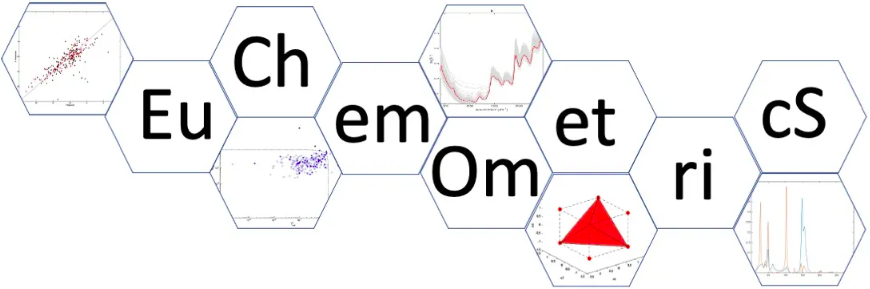

# Import Required Libraries

> Ajouter une citation


Import the necessary libraries, including pandas, numpy, matplotlib, seaborn, and sklearn.

In [ ]:
# installing needed libraries
!pip install lazypredict

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load and Explore the Datasets
Load the LIBS spectra and chemical elements datasets using pandas. Explore the datasets by checking the first few rows, data types, and summary statistics.

In [ ]:
# Load the LIBS spectra dataset
libs_spectra = pd.read_csv('/content/Al_Spectre.csv')

In [ ]:
# Show our direct dataset
libs_spectra.head()

,element,0,1,2,3,4,5,6,7,8,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,3004.00,179,182,184,191,199,204,208,211,213,...,818,809,808,804,798,796,796,794,791,796
1,3004.10,179,184,186,189,194,204,210,207,205,...,830,823,823,819,812,808,808,809,807,804
2,3004.20,86,92,97,101,104,112,116,113,116,...,831,824,820,812,803,805,803,798,799,801
3,3005.00,88,92,96,100,105,112,115,116,121,...,822,816,813,806,797,795,790,790,791,793
4,3005.10,132,140,142,146,153,158,158,160,163,...,817,809,806,802,796,794,792,792,796,796


In [ ]:
# Show our direct dataset tail
libs_spectra.tail()

,element,0,1,2,3,4,5,6,7,8,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
22,1063.10,14,19,25,34,39,40,45,52,54,...,885,879,873,860,855,852,849,850,857,859
23,1063.20,0,6,8,15,23,28,28,28,36,...,867,858,852,850,844,844,842,842,840,840
24,413.00,97,102,105,111,114,119,121,126,128,...,925,915,906,895,893,885,885,883,892,893
25,413.10,88,94,98,101,106,115,123,126,125,...,923,915,917,915,909,900,897,897,892,890
26,413.20,167,171,176,185,192,195,195,197,201,...,892,890,888,882,876,876,875,878,879,880


In [ ]:
# Display summary statistics of the LIBS spectra dataset
libs_spectra.describe()

,element,0,1,2,3,4,5,6,7,8,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,...,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,3840.88,128.96,133.78,137.89,143.52,150.59,158.74,162.59,162.26,162.37,...,851.22,845.04,841.74,835.93,829.44,826.41,825.81,825.67,827.33,827.48
std,2158.87,57.15,56.80,56.95,56.76,58.05,60.73,60.65,57.98,55.61,...,32.83,31.78,31.67,31.52,32.44,31.03,30.80,31.23,32.01,31.67
min,413.00,0.00,6.00,8.00,15.00,23.00,28.00,28.00,28.00,36.00,...,802.00,803.00,800.00,796.00,785.00,782.00,784.00,783.00,785.00,784.00
25%,3004.05,92.50,98.00,101.50,106.00,110.00,117.00,122.00,126.00,126.50,...,826.00,822.00,815.00,806.00,803.00,801.50,801.00,796.50,797.50,799.00
50%,3105.10,133.00,138.00,142.00,146.00,153.00,158.00,160.00,163.00,167.00,...,850.00,844.00,839.00,834.00,823.00,822.00,820.00,823.00,826.00,824.00
75%,6061.15,161.50,167.50,172.50,181.00,190.00,202.50,206.00,197.00,198.00,...,868.00,859.50,857.00,853.00,846.00,845.00,843.00,843.50,845.50,842.00
max,6351.20,249.00,254.00,262.00,269.00,284.00,303.00,307.00,295.00,281.00,...,925.00,915.00,917.00,915.00,909.00,900.00,897.00,897.00,892.00,893.00


In [ ]:
# Show some information considering our dataset
libs_spectra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 2017 entries, element to 2015
dtypes: float64(1), int64(2016)
memory usage: 425.6 KB


In [ ]:
# Load the chemical elements dataset
chemical_elements = pd.read_csv('/content/CRM ELEMISSION Maroc-1.csv')

In [ ]:
# Display the first few rows of the chemical elements dataset
chemical_elements.head(10)

,element,Certifié le,Inventaire,Débit / an,Tri,REMARQUE,Tiers,Prix,Type,Statut,...,Zr,Sb,P,K,SiC,Hg,As,Ba,Mo,Tl
0,413,06/10/1994,33.00,17.00,1,NaN,N,200,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6061,10/17/2000,499.00,NaN,0,standard de contrôle de qualité,N,150,D,NaN,...,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3005,05/06/1993,49.00,10.00,1,NaN,N,200,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3104,NaN,NaN,40.00,0,remplace 3104 CAJ,N,295,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3105,04/20/1994,200.00,26.00,1,NaN,N,200,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6111,06/21/1995,417.00,3.00,1,recu le 4-11-94,N,200,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3004,02/01/1994,1.00,12.00,1,Ok,N,200,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5454,03/02/1992,49.00,5.00,1,NaN,N,200,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6351,04/25/1996,138.00,38.00,1,analyse de variance à venir en Juin 96,N,240,D,NaN,...,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Display the last few rows of the chemical elements dataset
chemical_elements.tail()

,element,Certifié le,Inventaire,Débit / an,Tri,REMARQUE,Tiers,Prix,Type,Statut,...,Zr,Sb,P,K,SiC,Hg,As,Ba,Mo,Tl
4,3105,04/20/1994,200.00,26.00,1,NaN,N,200,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6111,06/21/1995,417.00,3.00,1,recu le 4-11-94,N,200,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3004,02/01/1994,1.00,12.00,1,Ok,N,200,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5454,03/02/1992,49.00,5.00,1,NaN,N,200,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6351,04/25/1996,138.00,38.00,1,analyse de variance à venir en Juin 96,N,240,D,NaN,...,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Display summary statistics of the chemical elements dataset
chemical_elements.describe()

,element,Inventaire,Débit / an,Tri,Prix,Statut,InvCheck,Number,Position,Initial,...,Zr,Sb,P,K,SiC,Hg,As,Ba,Mo,Tl
count,9.00,8.00,8.00,9.00,9.00,0.00,0.00,9.00,0.00,9.00,...,8.00,7.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,4067.56,173.25,18.88,0.78,209.44,NaN,NaN,15934.00,NaN,230.00,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2023.51,188.11,14.33,0.44,39.25,NaN,NaN,5248.49,NaN,188.02,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,413.00,1.00,3.00,0.00,150.00,NaN,NaN,10346.00,NaN,120.00,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3005.00,45.00,8.75,1.00,200.00,NaN,NaN,10388.00,NaN,120.00,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3105.00,93.50,14.50,1.00,200.00,NaN,NaN,20145.00,NaN,120.00,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6061.00,254.25,29.00,1.00,200.00,NaN,NaN,20175.00,NaN,250.00,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,6351.00,499.00,40.00,1.00,295.00,NaN,NaN,21066.00,NaN,600.00,...,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Show some information considering our dataset
chemical_elements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 49 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   element      9 non-null      int64  
 1   Certifié le  8 non-null      object 
 2   Inventaire   8 non-null      float64
 3   Débit / an   8 non-null      float64
 4   Tri          9 non-null      int64  
 5   REMARQUE     5 non-null      object 
 6   Tiers        9 non-null      object 
 7   Prix         9 non-null      int64  
 8   Type         9 non-null      object 
 9   Statut       0 non-null      float64
 10  InvCheck     0 non-null      float64
 11  Number       9 non-null      int64  
 12  Alloy        9 non-null      object 
 13  Series       9 non-null      object 
 14  Position     0 non-null      float64
 15  Remplace     7 non-null      object 
 16  Initial      9 non-null      int64  
 17  Cu           8 non-null      float64
 18  Fe           8 non-null      float64
 19  Mg          

# Data Preprocessing
Clean and preprocess the data. This includes handling missing values, outliers, and categorical variables.

In [ ]:
# Check for missing values in the LIBS spectra dataset
missing_values_libs_spectra = libs_spectra.isnull().sum()
missing_values_libs_spectra

element    0
0          0
1          0
2          0
3          0
          ..
2011       0
2012       0
2013       0
2014       0
2015       0
Length: 2017, dtype: int64

In [ ]:
# If there are missing values, fill them with the mean of the column
libs_spectra = libs_spectra.fillna(libs_spectra.mean())

In [ ]:
# Check for missing values in the chemical elements dataset
missing_values_chemical_elements = chemical_elements.isnull().sum()
missing_values_chemical_elements

element        0
Certifié le    1
Inventaire     1
Débit / an     1
Tri            0
REMARQUE       4
Tiers          0
Prix           0
Type           0
Statut         9
InvCheck       9
Number         0
Alloy          0
Series         0
Position       9
Remplace       2
Initial        0
Cu             1
Fe             1
Mg             1
Mn             1
Ni             1
Si             1
Ti             1
Zn             1
Bi             2
Cr             1
Pb             1
Sn             1
B              4
Be             2
Ca             1
Cd             3
Co             4
Ga             1
Li             2
Na             1
Sr             2
V              1
Zr             1
Sb             2
P              1
K              9
SiC            9
Hg             9
As             9
Ba             9
Mo             9
Tl             9
dtype: int64

In [ ]:
# If there are missing values, fill them with the mean of the column
chemical_elements = chemical_elements.fillna(chemical_elements.select_dtypes(np.number).quantile())

In [ ]:
chemical_elements.head()

,element,Certifié le,Inventaire,Débit / an,Tri,REMARQUE,Tiers,Prix,Type,Statut,...,Zr,Sb,P,K,SiC,Hg,As,Ba,Mo,Tl
0,413,06/10/1994,33.00,17.00,1,NaN,N,200,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6061,10/17/2000,499.00,14.50,0,standard de contrôle de qualité,N,150,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3005,05/06/1993,49.00,10.00,1,NaN,N,200,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3104,NaN,93.50,40.00,0,remplace 3104 CAJ,N,295,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3105,04/20/1994,200.00,26.00,1,NaN,N,200,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convert 'element' to numeric
libs_spectra['element'] = libs_spectra['element'].astype(int)

In [ ]:
libs_spectra.head()

,element,0,1,2,3,4,5,6,7,8,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,3004,179,182,184,191,199,204,208,211,213,...,818,809,808,804,798,796,796,794,791,796
1,3004,179,184,186,189,194,204,210,207,205,...,830,823,823,819,812,808,808,809,807,804
2,3004,86,92,97,101,104,112,116,113,116,...,831,824,820,812,803,805,803,798,799,801
3,3005,88,92,96,100,105,112,115,116,121,...,822,816,813,806,797,795,790,790,791,793
4,3005,132,140,142,146,153,158,158,160,163,...,817,809,806,802,796,794,792,792,796,796


In [ ]:
# Merge the two datasets on the 'element' column
merged_data = pd.merge(libs_spectra ,chemical_elements,on='element')
merged_data.drop('element' , axis=1 , inplace=True)

In [ ]:
# Identify columns with all non-NaN values
cols_with_all_non_nan = merged_data.columns[merged_data.isna().all()]
merged_data.drop(cols_with_all_non_nan, axis=1, inplace=True)

In [ ]:
merged_data.head()

,0,1,2,3,4,5,6,7,8,9,...,Cd,Co,Ga,Li,Na,Sr,V,Zr,Sb,P
0,179,182,184,191,199,204,208,211,213,217,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,179,184,186,189,194,204,210,207,205,207,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,86,92,97,101,104,112,116,113,116,119,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,88,92,96,100,105,112,115,116,121,125,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,132,140,142,146,153,158,158,160,163,166,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Exploratory Data Analysis
Perform exploratory data analysis to understand the relationships between different variables. This includes correlation analysis and data visualization.

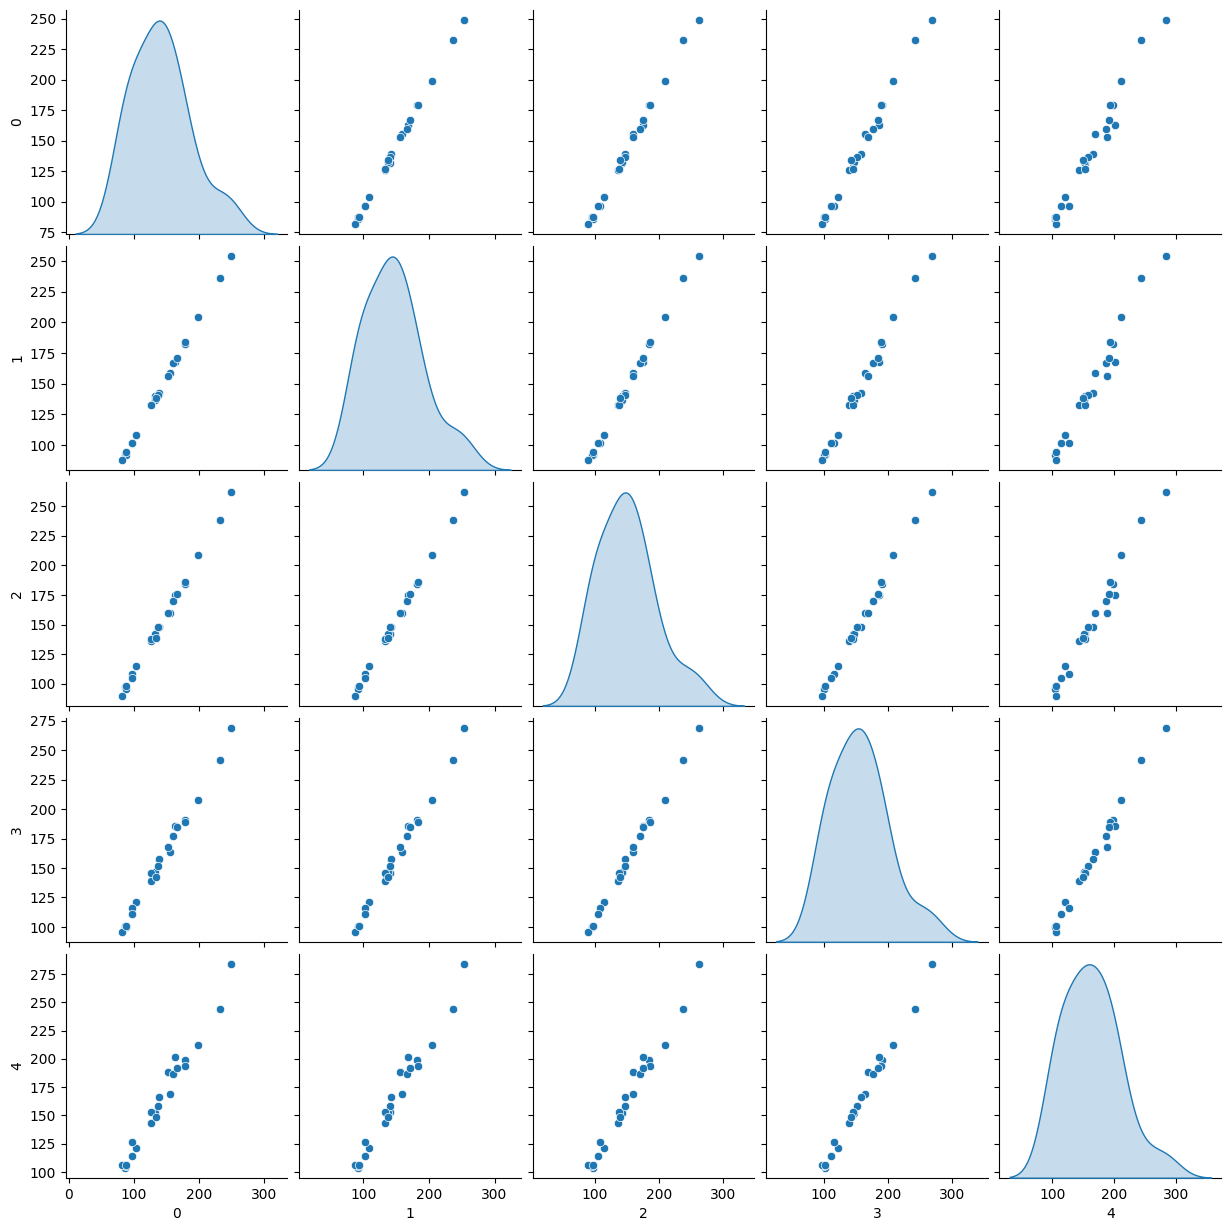

In [ ]:
# Generate a custom diverging colormap
sns.pairplot(merged_data[merged_data.columns[0:5]] , diag_kind='kde')
plt.show()

# Data Splitting
Split the merged dataset into training and testing sets.

In [ ]:
# Split the merged dataset into training and testing sets
X = merged_data.drop(columns = ['Cu', 'Fe', 'Mg', 'Mn', 'Ni', 'Si', 'Ti', 'Zn', 'Bi', 'Cr', 'Pb', 'Sn', 'B', 'Be', 'Ca', 'Cd', 'Co', 'Ga', 'Li', 'Na', 'Sr', 'V', 'Zr', 'Sb', 'P']) # Features
y = merged_data[['Fe','Mg','Zn','Cu','Ca','Na','Ni','P','Li']] # Targets

In [ ]:
# Removing no nedeed and outlier data
X = X[[col for col in X.columns if col.isdigit()]]

In [ ]:
# Showing new format of our features and target
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,179,182,184,191,199,204,208,211,213,217,...,818,809,808,804,798,796,796,794,791,796
1,179,184,186,189,194,204,210,207,205,207,...,830,823,823,819,812,808,808,809,807,804
2,86,92,97,101,104,112,116,113,116,119,...,831,824,820,812,803,805,803,798,799,801
3,88,92,96,100,105,112,115,116,121,125,...,822,816,813,806,797,795,790,790,791,793
4,132,140,142,146,153,158,158,160,163,166,...,817,809,806,802,796,794,792,792,796,796


In [ ]:
# Showing new format of our features and target
y.tail()

,Fe,Mg,Zn,Cu,Ca,Na,Ni,P,Li
19,0.32,0.61,0.06,0.06,0.00,0.00,0.03,0.01,0.00
20,0.32,0.61,0.06,0.06,0.00,0.00,0.03,0.01,0.00
21,0.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
22,0.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
23,0.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Use Decomposition Method

In [ ]:
# importing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Assuming merged_data is your dataset
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(X)

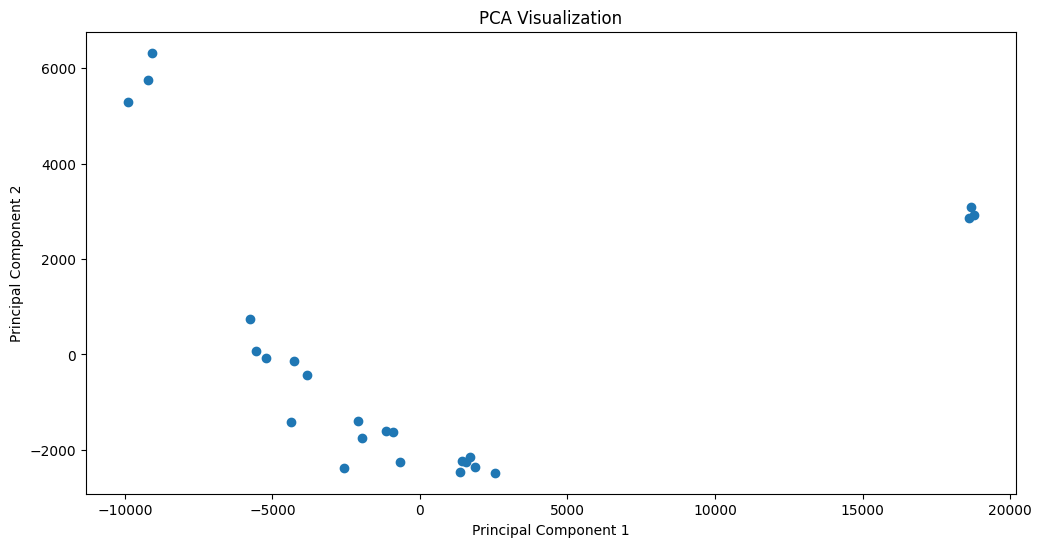

In [ ]:
# Visualize the transformed data
plt.figure(figsize=(12, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

In [ ]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the shapes of the training and testing sets
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Testing set - Features: ", X_test.shape, "Target: ", y_test.shape)

Training set - Features:  (19, 2016) Target:  (19, 9)
Testing set - Features:  (5, 2016) Target:  (5, 9)


In [ ]:
X_train.to_csv("/content/train.csv")
y_train.to_csv("/content/train.csv")

# Simple Aproach Using LazyPredict

we are going to use some all possible regression model on our data to see directly which one going to present the best perfomance for us

In [ ]:
# Importing needed libararies
from lazypredict.Supervised import LazyRegressor

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

In [ ]:
# using Fe as a first example
y_example_train = y_train['Fe'].values
y_example_test = y_test['Fe'].values

In [ ]:
# Fit and prediction
models, predictions = reg.fit(X_train, X_test, y_example_train, y_example_test)

In [ ]:
# Show Evaluation perfomance
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,4014004648128780756320256.00,-2019044338008777048994086912.00,6851044043608.50,1.58
SGDRegressor,631044474539160513806336.00,-317415370693197773609631744.00,2716425559281.83,0.31
MLPRegressor,1.02,-10.10,0.51,0.63
GaussianProcessRegressor,1.01,-5.34,0.38,1.11
KernelRidge,1.01,-3.88,0.34,1.29
PassiveAggressiveRegressor,1.01,-1.85,0.26,0.35
DecisionTreeRegressor,1.00,-0.06,0.16,0.32
LarsCV,1.00,-0.00,0.15,5.73
DummyRegressor,1.00,-0.00,0.15,0.28


# Model Building
Build regression models using different algorithms, including Linear Regression, Random Forest Regression, and Support Vector Regression.

In [ ]:
# using one by one column
models = []
mse_scores = []
rscores = []
predictions = {}

In [ ]:
for element in y.columns:
  y_train_element = y_train[element]
  y_test_element = y_test[element]

  model = LinearRegression()
  model.fit(X_train, y_train_element)
  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test_element, y_pred)
  r2 = r2_score(y_test_element, y_pred)

  models.append(model)
  mse_scores.append(mse)
  rscores.append(r2)

  predictions[element] = y_pred

In [ ]:
# Create a table with the results
table = pd.DataFrame({
  "Element": y.columns,
  "MSE": mse_scores,
  "R2 Score": rscores
})

In [ ]:
# show the latest result
table

,Element,MSE,R2 Score
0,Fe,0.00,0.94
1,Mg,0.00,0.99
2,Zn,0.00,0.97
3,Cu,0.00,0.90
4,Ca,0.00,0.97
5,Na,0.00,0.97
6,Ni,0.00,0.98
7,P,0.00,0.97
8,Li,0.00,0.96


In [ ]:
import plotly.graph_objects as go

In [ ]:
# Extracting data
elements = table['Element']
mse = table['MSE']
r2score = table['R2 Score']

In [ ]:
fig = go.Figure()

# Adding MSE bars
fig.add_trace(go.Bar(
    x=elements,
    y=mse,
    name='MSE',
    marker_color='lightblue'
))

In [ ]:
# Adding R2 Score bars
fig = go.Figure()

fig.add_trace(go.Bar(
    x=elements,
    y=r2score,
    name='R2 Score',
    marker_color='lightgreen'
))

In [ ]:
from plotly.subplots import make_subplots

# Create subplots using make_subplots
fig = make_subplots(rows=3, cols=3, subplot_titles=[f'Actual vs Predicted Values for {element}' for element in y.columns])

for idx, element in enumerate(y.columns):
    row = idx // 3 + 1
    col = idx % 3 + 1

    # Add scatter plot
    fig.add_trace(go.Scatter(x=y_test[element], y=predictions[element], mode='markers',
                             marker=dict(color='blue'),showlegend=False), row=row, col=col)

    # Add perfect prediction line
    fig.add_trace(go.Scatter(x=y_test[element], y=y_test[element], mode='lines',
                             line=dict(color='red', dash='dash'),showlegend=False), row=row, col=col)

    # Set subplot axis labels
    fig.update_xaxes(title_text="Actual", row=row, col=col)
    fig.update_yaxes(title_text="Predicted", row=row, col=col)

fig.update_layout(height=900, width=1200)

fig.show()

# Model Real Time Application
Using our model to make prediction in real time

In [ ]:
# geting element from the user
element_user = input('Which Element You Are Looking For : ')

Which Element You Are Looking For : Mg


In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train , y_train[element_user])

LinearRegression()

In [ ]:
# specific signal
line = 2
X_new = X_test.values[line]
result = linear_regression.predict([X_new])

In [ ]:
# ask user for the needed element
print(f"The concentration of this element is : {round(result[0] , 4)}")
print(f"Knowing that the actual value is : {round(y_test[element_user][0],4)}")

The concentration of this element is : 1.2675
Knowing that the actual value is : 1.26


# Using Other Models Aproche For Better Result

In this part we are going to use different regression techniques for potentially better performance than linear regression alone

## SMIO

The optimization objective for MultiTaskLasso is:

$$
\huge \frac{1}{2 n_{\text{samples}}} \| Y - X W \|_F^2 + \alpha \| W \|_{2,1}
$$

Where:

$$
\huge \|W\|_{2,1} = \sum_i \sqrt{\sum_j w_{ij}^2}
$$


In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
models_smio = []
mse_scores_smio = []
r2_scores_smio = []
prediction_smio = {}

In [ ]:
for element in y.columns:
  y_train_element = y_train[element]
  y_test_element = y_test[element]

  model = LassoCV()
  model.fit(X_train, y_train_element)
  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test_element, y_pred)
  r2 = r2_score(y_test_element, y_pred)

  models_smio.append(model)
  mse_scores_smio.append(mse)
  r2_scores_smio.append(r2)

  prediction_smio[element] = y_pred

In [ ]:
# Create a table with the results
table_smio = pd.DataFrame({
  "Element": y.columns,
  "MSE": mse_scores_smio,
  "R2 Score": r2_scores_smio
})

In [ ]:
table_smio

,Element,MSE,R2 Score
0,Fe,0.00,0.96
1,Mg,0.01,0.98
2,Zn,0.00,0.89
3,Cu,0.00,0.96
4,Ca,0.00,0.92
5,Na,0.00,0.87
6,Ni,0.00,0.94
7,P,0.00,0.98
8,Li,0.00,0.94


## ElasticNet

Minimizes the objective function:
$$
\frac{1}{2 n_{\text{samples}}} \| y - Xw \|_2^2
+ \alpha \cdot \text{l1\_ratio} \cdot \| w \|_1
+ 0.5 \cdot \alpha \cdot (1 - \text{l1\_ratio}) \cdot \| w \|_2^2
$$



In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
models_elastic = []
mse_scores_elastic = []
r2_scores_elastic = []
prediction_elastic = {}

In [ ]:
for element in y.columns:
  y_train_element = y_train[element]
  y_test_element = y_test[element]

  model = ElasticNet()
  model.fit(X_train, y_train_element)
  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test_element, y_pred)
  r2 = r2_score(y_test_element, y_pred)

  models_elastic.append(model)
  mse_scores_elastic.append(mse)
  r2_scores_elastic.append(r2)

  prediction_elastic[element] = y_pred

In [ ]:
# Create a table with the results
table_elastic = pd.DataFrame({
  "Element": y.columns,
  "MSE": mse_scores_elastic,
  "R2 Score": r2_scores_elastic
})

In [ ]:
table_elastic

,Element,MSE,R2 Score
0,Fe,0.00,0.91
1,Mg,0.01,0.99
2,Zn,0.00,0.56
3,Cu,0.00,0.97
4,Ca,0.00,-0.04
5,Na,0.00,-0.04
6,Ni,0.00,-0.02
7,P,0.00,0.05
8,Li,0.00,-0.06


## PLSRegression

$$
\huge B = W h (P'h W h)^{-1} C'h
$$

In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
max_components = min(X_train.shape[1], 10)
n_components_range = list(range(1, max_components + 1))

In [ ]:
# Dictionary to store best number of components for each target variable
best_components = {}

In [ ]:
for element in y.columns:
    y_train_element = y_train[element]
    model = PLSRegression()
    grid_search = GridSearchCV(estimator=model, param_grid={'n_components': n_components_range}, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train_element)
    best_n_components = grid_search.best_params_['n_components']
    best_components[element] = best_n_components

In [ ]:
# Output the best number of components for each target variable
print("Best number of components for each target variable:")
print(best_components)

Best number of components for each target variable:
{'Fe': 4, 'Mg': 6, 'Zn': 10, 'Cu': 10, 'Ca': 6, 'Na': 6, 'Ni': 6, 'P': 8, 'Li': 8}


In [ ]:
models_pls = []
mse_scores_pls = []
r2_scores_pls = []
prediction_pls = {}

In [ ]:
for element in y.columns:
    y_train_element = y_train[element]
    y_test_element = y_test[element]

    # Instantiate PLS Regression with the best number of components
    model = PLSRegression(n_components=best_components[element])

    # Fit the model
    model.fit(X_train, y_train_element)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test_element, y_pred)
    r2 = r2_score(y_test_element, y_pred)

    models_pls.append(model)
    mse_scores_pls.append(mse)
    r2_scores_pls.append(r2)

    prediction_pls[element] = y_pred

In [ ]:
# Create a table with the results
table_pls = pd.DataFrame({
  "Element": y.columns,
  "MSE": mse_scores_pls,
  "R2 Score": r2_scores_pls
})

In [ ]:
table_pls

,Element,MSE,R2 Score
0,Fe,0.00,0.80
1,Mg,0.00,0.99
2,Zn,0.00,0.74
3,Cu,0.01,0.50
4,Ca,0.00,0.61
5,Na,0.00,0.91
6,Ni,0.00,0.73
7,P,0.00,0.95
8,Li,0.00,0.93


# Evaluate The Perfomance Of Each Model

In [ ]:
# Merge the tables into a single DataFrame
merged_table = pd.merge(table, table_pls, on="Element", suffixes=("_lr", "_pls"))
merged_table = pd.merge(merged_table, table_elastic, on="Element", suffixes=("_pls", "_elastic"))
merged_table = pd.merge(merged_table, table_smio, on="Element", suffixes=("_elastic", "_smio"))

In [ ]:
merged_table

,Element,MSE_lr,R2 Score_lr,MSE_pls,R2 Score_pls,MSE_elastic,R2 Score_elastic,MSE_smio,R2 Score_smio
0,Fe,0.00,0.94,0.00,0.80,0.00,0.91,0.00,0.96
1,Mg,0.00,0.99,0.00,0.99,0.01,0.99,0.01,0.98
2,Zn,0.00,0.97,0.00,0.74,0.00,0.56,0.00,0.89
3,Cu,0.00,0.90,0.01,0.50,0.00,0.97,0.00,0.96
4,Ca,0.00,0.97,0.00,0.61,0.00,-0.04,0.00,0.92
5,Na,0.00,0.97,0.00,0.91,0.00,-0.04,0.00,0.87
6,Ni,0.00,0.98,0.00,0.73,0.00,-0.02,0.00,0.94
7,P,0.00,0.97,0.00,0.95,0.00,0.05,0.00,0.98
8,Li,0.00,0.96,0.00,0.93,0.00,-0.06,0.00,0.94


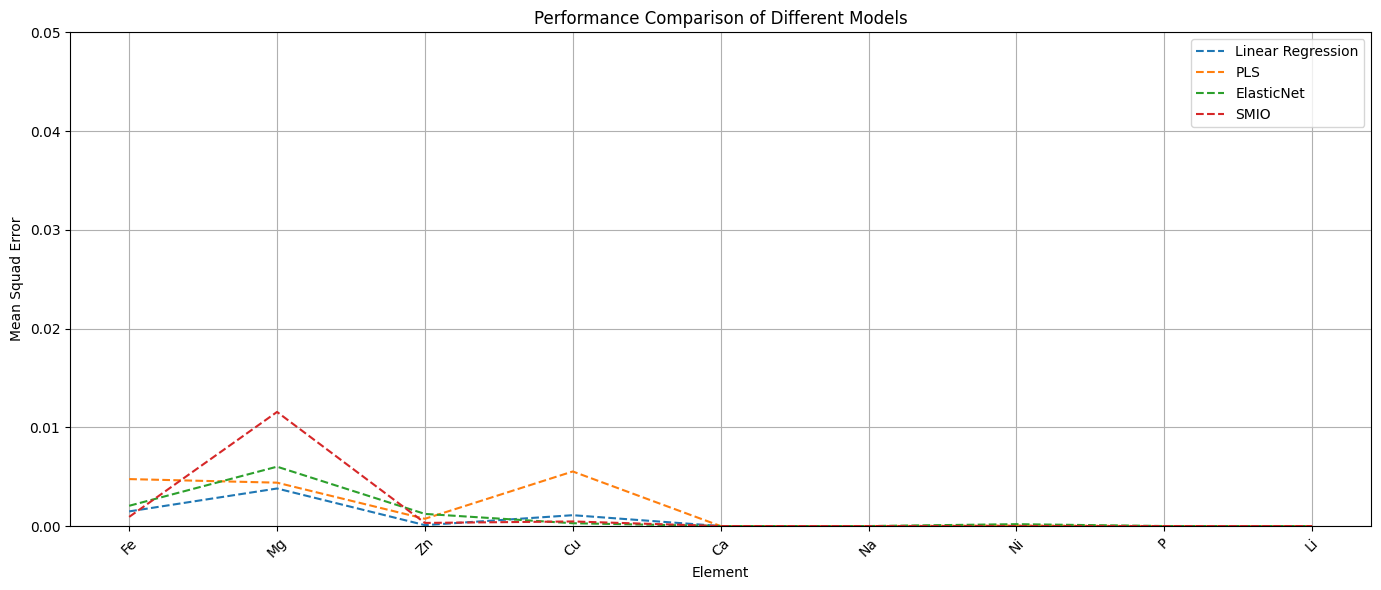

In [ ]:
# Plotting the predictions of each model against the actual values
plt.figure(figsize=(14, 6))


# Plotting MSE scores
plt.plot(merged_table["Element"], merged_table["MSE_lr"], label='Linear Regression' ,linestyle='--')
plt.plot(merged_table["Element"], merged_table["MSE_pls"], label='PLS' ,linestyle='--')
plt.plot(merged_table["Element"], merged_table["MSE_elastic"], label='ElasticNet',linestyle='--')
plt.plot(merged_table["Element"], merged_table["MSE_smio"], label='SMIO' ,linestyle='--')

plt.xlabel('Element')
plt.ylabel('Mean Squad Error')
plt.title('Performance Comparison of Different Models')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 0.05)
plt.show()


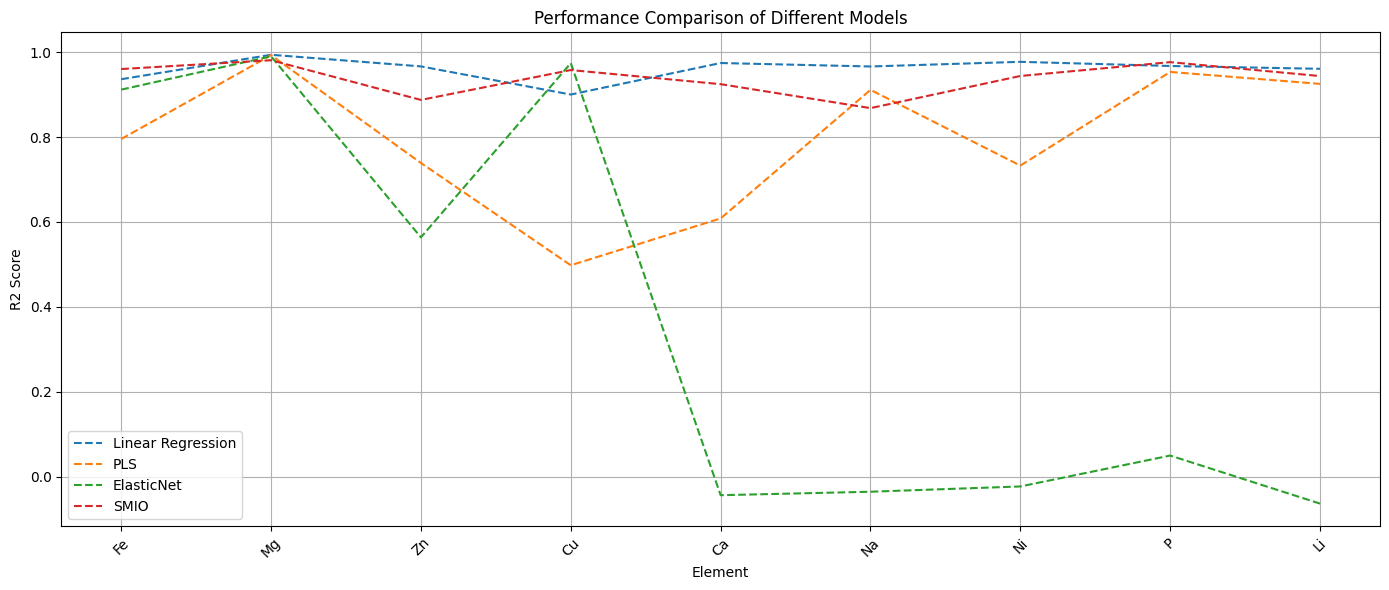

In [ ]:
# Plotting the predictions of each model against the actual values
plt.figure(figsize=(14, 6))

# Plotting R2 scores
plt.plot(merged_table["Element"], merged_table["R2 Score_lr"], label='Linear Regression', linestyle='--')
plt.plot(merged_table["Element"], merged_table["R2 Score_pls"], label='PLS', linestyle='--')
plt.plot(merged_table["Element"], merged_table["R2 Score_elastic"], label='ElasticNet', linestyle='--')
plt.plot(merged_table["Element"], merged_table["R2 Score_smio"], label='SMIO', linestyle='--')

plt.xlabel('Element')
plt.ylabel('R2 Score')
plt.title('Performance Comparison of Different Models')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# specific signal
line = 1

In [ ]:
# ask user for the needed element
element_user = input('Which Element You Are Looking For : ')
result_1 = predictions[element_user][line]
result_2 = prediction_smio[element_user][line]
result_3 = prediction_elastic[element_user][line]
result_4 = prediction_pls[element_user][line]

Which Element You Are Looking For : Cu


In [ ]:
print(f"The concentration for LR of this element is : {result_1}")
print(f"The concentration for SMIO of this element is : {result_2}")
print(f"The concentration for ElasticNet of this element is : {result_3}")
print(f"The concentration for PLS of this element is : {result_4[0]}")

The concentration for LR of this element is : 0.3036123442272758
The concentration for SMIO of this element is : 0.2998329972015443
The concentration for ElasticNet of this element is : 0.29373095814369
The concentration for PLS of this element is : 0.31346731387883997


In [ ]:
print(f"Knowing that the actual value is : {y_test[element_user].values[line]}")

Knowing that the actual value is : 0.303


# Saving the model so that we can use it in another aproach

In [ ]:
import joblib

# Assuming models is your array of models
joblib.dump(models, '/content/ml_models_array.pkl')
joblib.dump(models_smio, '/content/smio_models_array.pkl')
joblib.dump(models_elastic, '/content/elastic_models_array.pkl')
joblib.dump(models_pls, '/content/pls_models_array.pkl')

['/content/pls_models_array.pkl']